In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

#### Imports for Regularization

In [18]:
from sklearn.linear_model import Ridge, RidgeCV 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet,ElasticNetCV

## Regularization

Regularization methods are intended to prevent or reduce overfitting thus improving generalization (i.e. improve performance on test set).

The methods described here penalize the model by adding additional constraints to the parameter optimization. They are:

- Ridge Regression
- Lasso Regression
- Elastic Net Regression

These regularization methods add a constraint(s) to the Ordinary Least Squares linear regression cost function that constrains (i.e. shrinks) the coefficients, thus the are called **Shrinkage Methods**.

We favor smaller coefficients because the larger the magnitude of the coefficient that greater the change in the response (i.e. greater variability). We do not want a lot of weight for any single predictor because if we have different training data, the response could vary with just slight change in this one predictor. The response would be overly sensitive to this predictor.

### Ridge Regression

In Ordinary Least Squares regression we estimate the coefficients $\beta$:

<div style="font-size: 110%;">
$$ \hat{\beta} =   \underset{\beta}{\mathrm{argmin}}\sum_i{(y_i - X_i^T\beta)^2}$$
</div>

This produces the vector of coefficients $\beta$ that is the **Best Linear Unbiased Estimator (BLUE)**. Of all the unbiased estimators (that is the ones that $\frac{1}{N}\sum_1^\infty{\hat{\beta}}$  = the population $\beta$) it has the lowest variance. This is the Gauss-Markov theorem.

But this may not have the best test set performance because the of the variance.

Ridge Regression adds a penalty equivalent to square of the magnitude of coefficients ($\beta^2$) to the OLS error. This is termed L2 regularization. It shrinks the coefficients toward zero but not to zero.
    
<div style="font-size: 110%;">
$$\hat{\beta} =  \underset{\beta}{\mathrm{argmin}}\sum_i{(y_i - X_i^T\beta)^2} + \lambda \sum_{j=1}^p\beta_j^2$$
</div>

By shrinking the coefficients, Ridge Regression constrains the model to fewer choices thus increasing the bias by a little, but the variance is greatly reduced due to the decrease in complexity

The $\lambda$ Parameter controls amount of regularization:

* $\lambda$ = 0: same as OLS Regression
* $\lambda$ >> 0: drives all the coefficients to very close to zero 



### Ridge Regression in sklearn

#### Ridge Class

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**The alpha keyword parameter is the $\lambda$ hyperparameter**


### Model for Hitters data

The Dependent variable is Salary with 16 numerical and 3 categorical predictors. The dataset has null values.

In [19]:
df = pd.read_csv("Hitters.csv")
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


In [20]:
np.sum(df.isnull())

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

#### Drop missing values and use only numerical values

In [21]:
df = df.dropna()
df = df.drop(['League','Division','NewLeague'],axis = 1)
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,408,4,3,1000.0


In [22]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


#### Create arrays and split data

In [23]:
X = df.iloc[:,0:16].values
y = df.iloc[:,16].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.25, random_state = 1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(197, 16) (66, 16) (197,) (66,)


#### Coefficients, $R^2$, and Mean Square Error of Ridge regression model

In [25]:
model_r = Ridge(alpha = 10)
model_r.fit(X_train,y_train)
coefs_r = model_r.coef_
print('R-Squared: ',model_r.score(X_train,y_train))
yhat = model_r.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
for n,v in zip(df.columns,coefs_r):
    print(n,round(v,3))


R-Squared:  0.4995498448645428
MSE:  83086.97505947598
AtBat -133.369
Hits 135.583
HmRun -19.354
Runs 44.65
RBI 24.752
Walks 54.721
Years -69.178
CAtBat -15.466
CHits 105.559
CHmRun 34.903
CRuns 144.282
CRBI 62.6
CWalks -40.063
PutOuts 78.801
Assists 15.833
Errors -1.156


#### Coefficients, $R^2$, and Mean Square Error of OLS regression model

In [26]:
model_l = LinearRegression()
model_l.fit(X_train,y_train)
coefs_l = model_l.coef_
print('R-Squared: ',model_l.score(X_train,y_train))
yhat = model_l.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
for n,v in zip(df.columns,coefs_l):
    print(n,round(v,3))

R-Squared:  0.5300312245228194
MSE:  88004.36248218546
AtBat -305.721
Hits 311.443
HmRun 31.737
Runs -35.847
RBI 0.167
Walks 101.596
Years -46.204
CAtBat -555.51
CHits 361.529
CHmRun -2.304
CRuns 485.774
CRBI 98.624
CWalks -127.995
PutOuts 84.38
Assists 39.568
Errors 3.224


#### Show shrinkage of coefficients

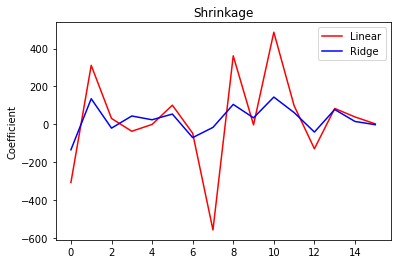

In [27]:
p1 = plt.plot(range(len(coefs_l)),coefs_l,'r') 
p2 = plt.plot(range(len(coefs_r)),coefs_r,'b') 
plt.title("Shrinkage")
plt.ylabel("Coefficient")
plt.legend((p1[0],p2[0]),("Linear","Ridge"));

#### Check that no coefficients shrunk to zero

In [28]:
print(f'Number of coefficients ridge regression shrunk to 0: {np.sum(coefs_r == 0)}')

Number of coefficients ridge regression shrunk to 0: 0


#### Ridge Cross Validation: RidgeCV Class

Cross Validation for alpha

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [29]:
model = RidgeCV(store_cv_values = True)
model.fit(X_train,y_train)
coefs_r = model.coef_
print('R-Squared: ',model.score(X_train,y_train))
print('Alpha: ', model.alpha_)

R-Squared:  0.5262778596414921
Alpha:  1.0


In [30]:
print(model.cv_values_[0])
model.get_params()

[364075.62896106 332325.91684097 207579.43648695]


{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': True}

### Lasso Regression

Lass regression is similar to Ridge regression. It adds penalty equivalent to absolute value of the magnitude of coefficients to the OLS error. This is called L1 regularization. This reduces overfitting by shrinking some of the coefficients to zero.

Like ridge Regression it increases bias a little but decreases variance by decreasing the number of predictors

It is also conseidered a form of model selection because it eliminates predictors.

<div style="font-size: 110%;">
$$\hat{\beta} =  \underset{\beta}{\mathrm{argmin}}\sum_i{(y_i - X_i^T\beta)^2} + \lambda \sum_{j=1}^p|\beta_j|$$
</div>

#### Lasso Regression in sklearn

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

#### Coefficients, $R^2$, and Mean Square Error of Ridge regression model

R-Squared:  0.47307340720937463
MSE:  89081.6695167567
Number of coefficients lasso regression shrunk to 0: 9


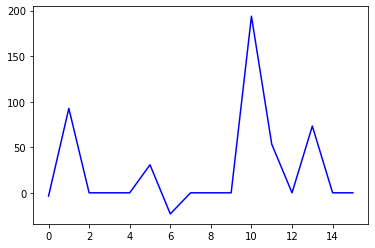

In [31]:
model = Lasso(alpha = 10.0)
model.fit(X_train,y_train)
coefs_lasso = model.coef_
print('R-Squared: ',model.score(X_train,y_train))
yhat = model.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
plt.plot(range(len(coefs_lasso)),coefs_lasso,'b')   
print(f'Number of coefficients lasso regression shrunk to 0: {np.sum(coefs_lasso == 0)}')

In [32]:
for n,v in zip(df.columns,coefs_lasso):
    if v != 0: print(n,round(v,3))

AtBat -3.571
Hits 92.696
Walks 30.756
Years -23.173
CRuns 193.862
CRBI 53.403
PutOuts 73.279


#### Lasso Cross Validation, sklearn LassoCV class

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

R-Squared:  -1.232072595066736
Number of coefficients lasso regression shrunk to 0: 7
Alpha:  540.6556677332911


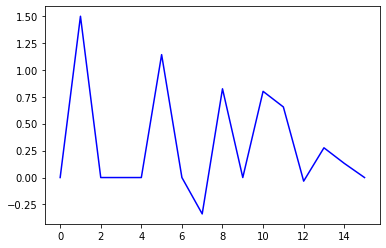

In [33]:
from sklearn.linear_model import LassoCV
model = LassoCV()
model.fit(X,y)
coefs_lasso = model.coef_
print('R-Squared: ',model.score(X_train,y_train))
plt.plot(range(len(coefs_lasso)),coefs_lasso,'b')   
print(f'Number of coefficients lasso regression shrunk to 0: {np.sum(coefs_lasso == 0)}')
print('Alpha: ', model.alpha_)

In [34]:
for n,v in zip(df.columns,coefs_lasso):
    if v != 0: print(n,round(v,3))

Hits 1.496
Walks 1.14
CAtBat -0.337
CHits 0.823
CRuns 0.799
CRBI 0.655
CWalks -0.033
PutOuts 0.276
Assists 0.132


In [35]:
np.corrcoef(df.loc[:,'Years'],df.loc[:,'Salary'])[0,1]

0.4006569943826859

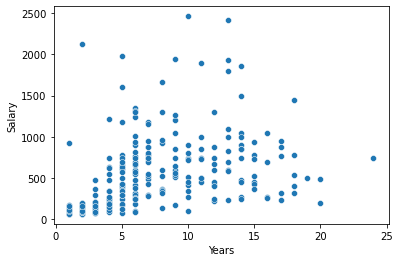

In [36]:
sns.scatterplot(df.loc[:,'Years'],df.loc[:,'Salary']);

#### Ridge versus Lasso

In general you use the shrinkage methods when you have many predictors (at least 3).

When to use Ridge versus Lasso regression?

* When you know that each predictor contributes something then use Ridge Regression.

* When you suspect that some of the predictors are useless then use Lasso Regression.

#### Constraint formulation

Ridge
<div style="font-size: 110%;">
$$\sum_i{(y_i - X_i^T\beta)^2} \text{ subject to } ||\beta||_2^2 \le c^2$$
</div>
Lasso
<div style="font-size: 110%;">
$$\sum_i{(y_i - X_i^T\beta)^2} \text{ subject to } ||\beta||_1 \le c$$
</div>

#### Constrained Optimization: Lagrange Multipliers
Ridge
<div style="font-size: 110%;">
$$ L(\beta,\lambda) =  \sum_i{(y_i - X_i^T\beta)^2} + \lambda(||\beta||_2^2 - c^2)$$
$$ = ||y-X\beta||_2^2 + \lambda||\beta||_2^2$$
</div>
Lasso
<div style="font-size: 110%;">
$$ L(\beta,\lambda) =  \sum_i{(y_i - X_i^T\beta)^2} + \lambda(||\beta||_1 - c)$$
$$ = ||y-X\beta||_2^2 + \lambda||\beta||_2^2$$
</div>

#### Geometric Interpretation

![](GeoIntrp.png)
$$\text{Figure 1. Left: Ridge, Right: Lasso}$$

Figure source: http://www.astroml.org/book_figures/chapter8/fig_lasso_ridge.html

#### Solution
The OLS solution to the unconstrained problem is $(X^TX)^{-1}X^Ty$

The Ridge solution to constrained problem is
$(X^TX + \lambda I)^{-1}X^Ty$

The is no Lasso solution to the constrained problem. It is solved by numerical methods.




### Elastic Net Regression

Elastic Net regression combines Ridge and Lasso regression. This combination is used for learning a sparse model where few of the weights are non-zero (like Lasso), while still maintaining the regularization properties of Ridge. 

Use this when you have a lot of variables and you don't know how each contributes or even if they are useful.

Two $\lambda$s, $\lambda_1$ for Lasso and $\lambda_2$ for Ridge

<div style="font-size: 110%;">
$$\hat{\beta} =  \underset{\beta}{\mathrm{argmin}}\sum_i{(y_i - X_i^T\beta)^2} + \lambda_1 \sum_{j=1}^p|\beta_j| + \lambda_2 \sum_{j=1}^p\beta_j^2$$
</div>

Use Cross Validation to determine the best $\lambda_1$ and $\lambda_2$

#### sklearn Elastic Net Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

$\alpha$ is the penalty weighting (i.e. $\lambda$)

l1_ratio isthe ElasticNet mixing parameter. $ 0 \le \text{l1_ratio} \le 1$. It determines the scaling of $\lambda_1$ and $\lambda_2$

* l1_ratio = 0: the penalty is a L2 penalty
* l1_ratio = 1: the penalty is a L1 penalty
* For 0 < l1_ratio < 1 it is a combination of L1 and L2

R-Squared:  0.45487024254303676
MSE:  84536.23041120706
Number of coefficients ElasticNet regression shrunk to 0: 0


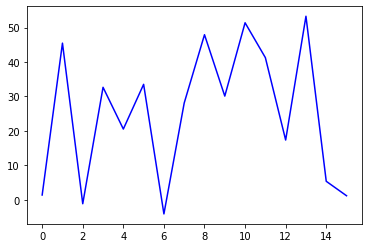

In [37]:
model = ElasticNet(l1_ratio = 0.5)
model.fit(X_train,y_train)
coefs_EN = model.coef_
print('R-Squared: ',model.score(X_train,y_train))
yhat = model.predict(X_test)
mse = np.mean((y_test - yhat)**2)
print('MSE: ',mse)
plt.plot(range(len(coefs_EN)),coefs_EN,'b')   
print(f'Number of coefficients ElasticNet regression shrunk to 0: {np.sum(coefs_EN == 0)}')

In [38]:
for n,v in zip(df.columns,coefs_EN):
    if v != 0: print(n,round(v,3))

AtBat 1.373
Hits 45.485
HmRun -1.158
Runs 32.661
RBI 20.537
Walks 33.521
Years -4.114
CAtBat 28.093
CHits 47.936
CHmRun 30.107
CRuns 51.402
CRBI 41.275
CWalks 17.343
PutOuts 53.297
Assists 5.361
Errors 1.164


#### sklearn Elastic Net Regression Cross Vaidation

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html



When the l1_ratio is a number, it is the weight for L1 constraint is alpha*l1_ratio and weight for L2 term is 0.5*alpha*(1 - l1_ratio).

When the l1_ratio is a list, the different values are tested by cross-validation. A good choice of list values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge)

$\alpha$ is the penalty weighting.

Number of coefficients ElasticNet regression shrunk to 0: 4


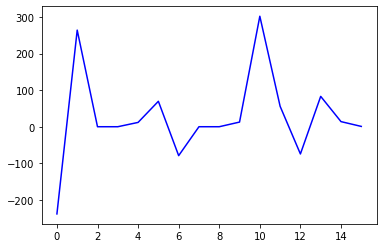

In [39]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
model.fit(X_train,y_train)
coefs_EN = model.coef_
plt.plot(range(len(coefs_EN)),coefs_EN,'b')   
print(f'Number of coefficients ElasticNet regression shrunk to 0: {np.sum(coefs_EN == 0)}')

In [40]:
model.alpha_

3.4262922537604132

In [41]:
model.l1_ratio_

1.0

In [42]:
for n,v in zip(df.columns,coefs_EN):
    if v != 0: print(n,round(v,3))

AtBat -238.237
Hits 263.96
RBI 11.778
Walks 69.502
Years -78.965
CHmRun 12.701
CRuns 301.889
CRBI 55.817
CWalks -74.406
PutOuts 82.947
Assists 13.981
Errors 0.859
